In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from gpt.gpt_distgen import run_gpt_with_distgen

In [17]:
GPT_INPUT_FILE = os.path.join(root,'templates/cu_injector/gpt.in')
DISTGEN_INPUT_FILE = os.path.join(root,'templates/cu_injector/distgen.in.yaml')

settings={'n_particle':200, 
          'space_charge':0,
          'Ntout':500,
          'gun_voltage':400,
          'buncher_voltage':50,
          'phiCTB01_off':-90, 
          'cavity_1_voltage':1000,
          'cavity_2_voltage':1000,
          'cavity_3_voltage':1000,
          'cavity_4_voltage':1000,
          'cavity_5_voltage':1000,
          'A3Quad_1_current':3,
          'A3Quad_2_current':-3,
          'A3Quad_3_current':3
         }

G1 = run_gpt_with_distgen(settings,
                          gpt_input_file=GPT_INPUT_FILE,
                          distgen_input_file=DISTGEN_INPUT_FILE,
                          verbose=True,
                          auto_phase=True)
print(G1)

Run GPT with Distgen:
Could no parse: Map2D_B("wcs", XSLA01,YSLA01,ZSLA01,  cos(THXSLA01),0,sin(THXSLA01), 0,1,0, "fields/solenoid_SLA_L60.gdf", "R", "Z", "Br", "Bz", BSLA01);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC02, 1,0,0, 0,-1,0, "fields/icm_1d.gdf", "z", "Ez", -ECTC02, phiCTC02, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC03, 1,0,0, 0,1,0, "fields/icm_1d.gdf", "z", "Ez", ECTC03, phiCTC03, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC04, 1,0,0, 0,-1,0, "fields/icm_1d.gdf", "z", "Ez", -ECTC04, phiCTC04, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC05, 1,0,0, 0,1,0, "fields/icm_1d.gdf", "z", "Ez", ECTC05, phiCTC05, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map25D_TM("wcs",   XMLC01, 0,  ZMLC01,   nz_MLC, 0, -nx_MLC, 0, 1, 0, "fields/mlc_scott_2D.gdf",  "r", "z", "Er

In [20]:
settings={'n_particle':200, 
          'space_charge':0,
          'Ntout':500,
          'gun_voltage':400,
          'buncher_voltage':50,
          'phiCTB01_off':-90, 
          'cavity_1_voltage':1000,
          'cavity_2_voltage':1000,
          'cavity_3_voltage':1000,
          'cavity_4_voltage':1000,
          'cavity_5_voltage':1000,
          'A3Quad_1_current':3,
          'A3Quad_2_current':-3,
          'A3Quad_3_current':3,
          'icm_1d_maps':1
         }

G2 = run_gpt_with_distgen(settings,
                          gpt_input_file=GPT_INPUT_FILE,
                          distgen_input_file=DISTGEN_INPUT_FILE,
                          verbose=True,
                          auto_phase=True)
print(G2)

Run GPT with Distgen:
Could no parse: Map2D_B("wcs", XSLA01,YSLA01,ZSLA01,  cos(THXSLA01),0,sin(THXSLA01), 0,1,0, "fields/solenoid_SLA_L60.gdf", "R", "Z", "Br", "Bz", BSLA01);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC02, 1,0,0, 0,-1,0, "fields/icm_1d.gdf", "z", "Ez", -ECTC02, phiCTC02, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC03, 1,0,0, 0,1,0, "fields/icm_1d.gdf", "z", "Ez", ECTC03, phiCTC03, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC04, 1,0,0, 0,-1,0, "fields/icm_1d.gdf", "z", "Ez", -ECTC04, phiCTC04, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC05, 1,0,0, 0,1,0, "fields/icm_1d.gdf", "z", "Ez", ECTC05, phiCTC05, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map25D_TM("wcs",   XMLC01, 0,  ZMLC01,   nz_MLC, 0, -nx_MLC, 0, 1, 0, "fields/mlc_scott_2D.gdf",  "r", "z", "Er

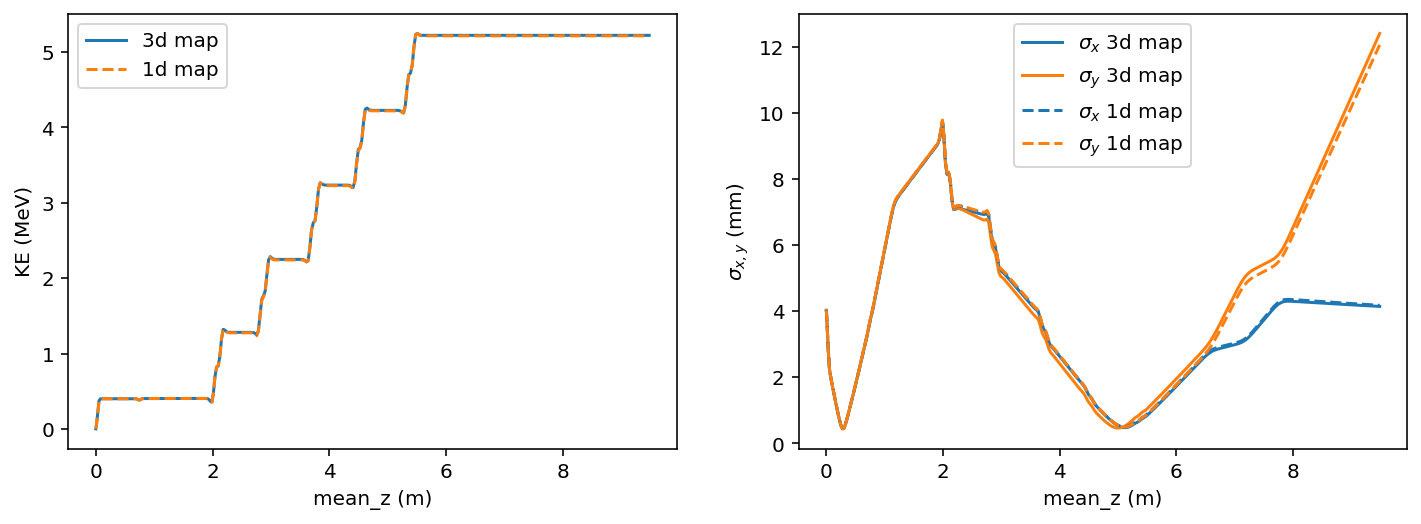

In [26]:
fig, ax = plt.subplots(1,2, figsize=(12,4))


ax[0].plot(G1.tout_stat('mean_z'), G1.tout_stat('mean_kinetic_energy')/1e6, color='tab:blue')
ax[0].plot(G2.tout_stat('mean_z'), G2.tout_stat('mean_kinetic_energy')/1e6, '--', color='tab:orange')
ax[0].set_xlabel('mean_z (m)');
ax[0].set_ylabel('KE (MeV)');
ax[0].legend(['3d map','1d map'])

ax[1].plot(G1.tout_stat('mean_z'), G1.tout_stat('sigma_x')*1e3, color='tab:blue');
ax[1].plot(G1.tout_stat('mean_z'), G1.tout_stat('sigma_y')*1e3, color='tab:orange');
ax[1].plot(G2.tout_stat('mean_z'), G2.tout_stat('sigma_x')*1e3, '--', color='tab:blue');
ax[1].plot(G2.tout_stat('mean_z'), G2.tout_stat('sigma_y')*1e3, '--', color='tab:orange');
#ax[1].plot(tzs, tstdy*1e3, pzs, pstdy*1e3, 'o', color='#ff7f0e')         
ax[1].set_xlabel('mean_z (m)');
ax[1].set_ylabel('$\sigma_{x,y}$ (mm)');
ax[1].legend(['$\sigma_x$ 3d map','$\sigma_y$ 3d map','$\sigma_x$ 1d map','$\sigma_y$ 1d map']);